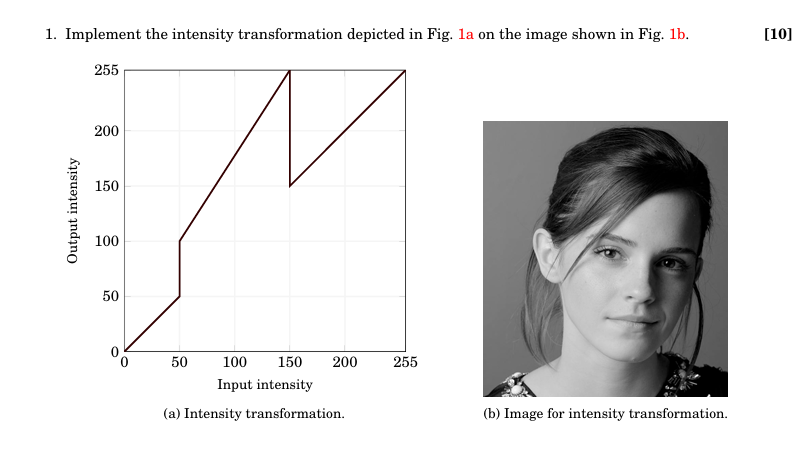

In [177]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [178]:
img1 = cv.imread("a1images/emma.jpg",cv.IMREAD_GRAYSCALE)
t1 = np.linspace(0, 50, 51, dtype=np.uint8)
t2 = np.linspace(100, 255, 150 - 51 + 1, dtype=np.uint8)
t3 = np.linspace(150, 255, 255 - 151 + 1, dtype=np.uint8)
#np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
#start: The beginning value of the sequence.
#stop: The end value of the sequence.
#num: How many samples to generate (default 50).
#endpoint: Whether to include the stop value (default True).
#retstep: If True, return the samples and the step size.
#dtype: Data type of the output array.

In [179]:
transform1 = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
img1_transformed = cv.LUT(img1,transform1)

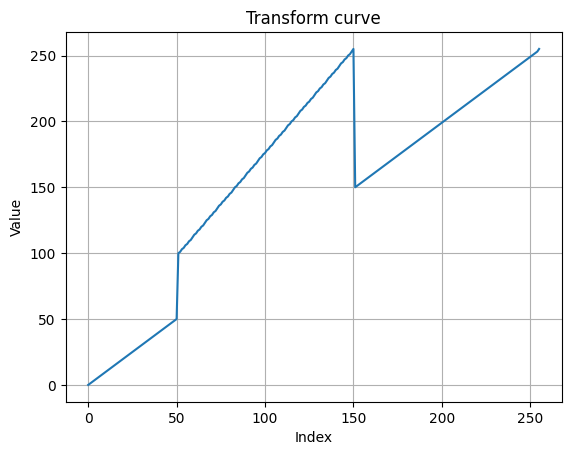

In [180]:
plt.plot(transform1)
plt.title("Transform curve")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

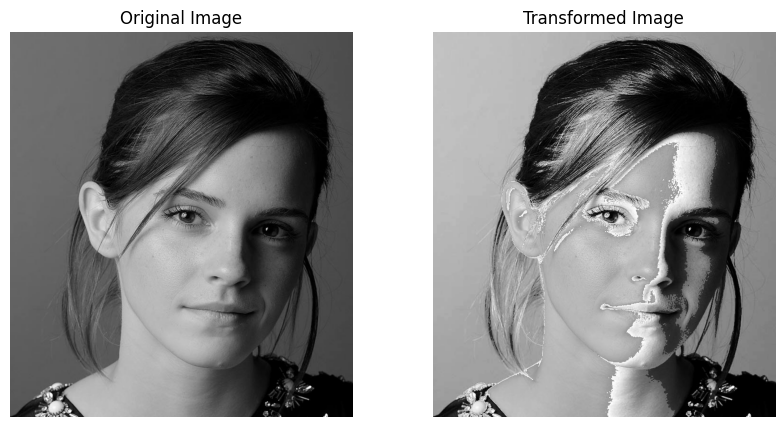

In [181]:
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1_rgb)  # Use cmap='gray' if image is grayscale
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.title("Transformed Image")
img1_transformed_rgb = cv.cvtColor(img1_transformed, cv.COLOR_BGR2RGB)
plt.imshow(img1_transformed_rgb)
plt.axis('off')

plt.show()

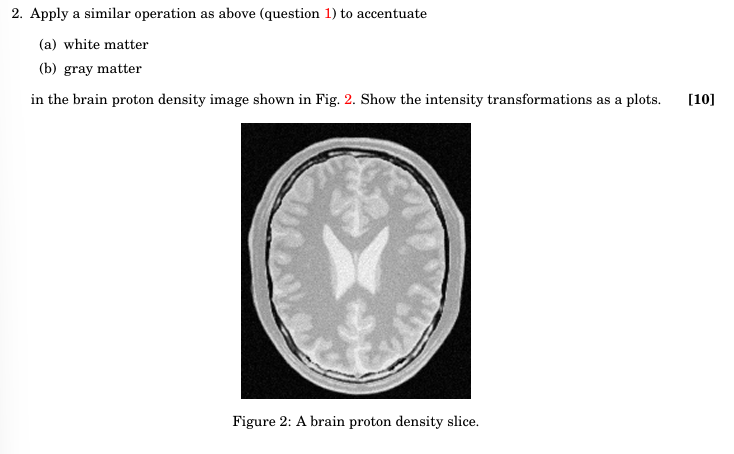

In [182]:
img2 = cv.imread("a1images/brain_proton_density_slice.png")


In [183]:
lut_white= np.array([
    int(i * 0.4) if i < 180 else min(255, int(i * 1.3))
    for i in range(256)
], dtype=np.uint8)

lut_gray= np.array([
    int(i * 0.3) if (i < 80 or i > 160) else min(255, int(i * 1.5))
    for i in range(256)
], dtype=np.uint8)


In [184]:
white_matter = cv.LUT(img2,lut_white)
gray_matter = cv.LUT(img2,lut_gray)

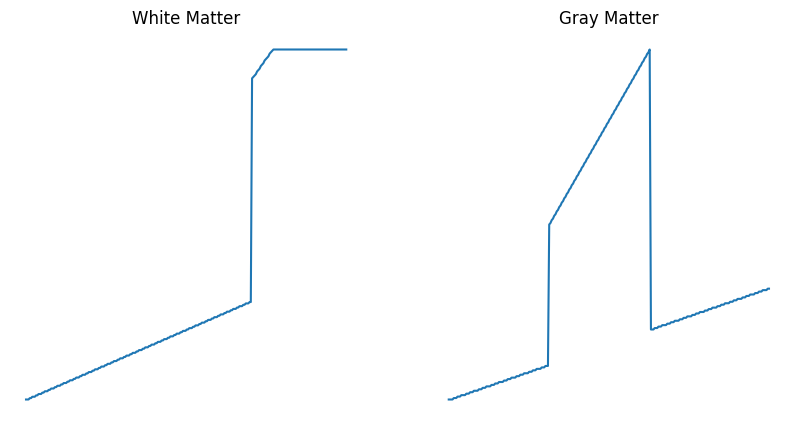

In [185]:
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.title("White Matter")
plt.plot(lut_white)  # Use cmap='gray' if image is grayscale
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.title("Gray Matter")
plt.plot(lut_gray)
plt.axis('off')

plt.show()

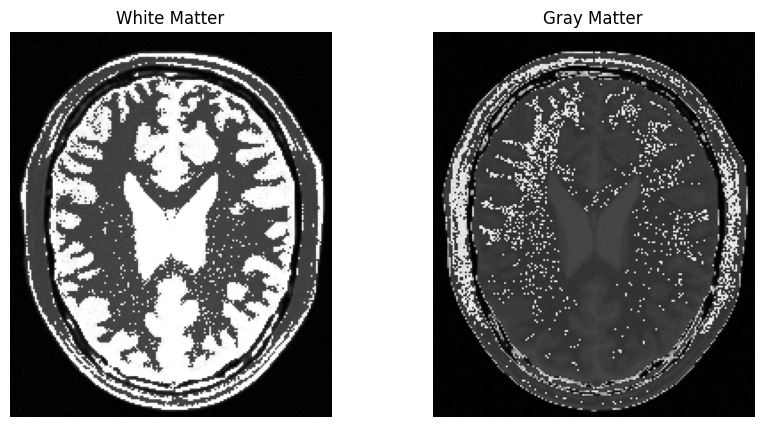

In [186]:
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.title("White Matter")
white_matter_rgb = cv.cvtColor(white_matter, cv.COLOR_BGR2RGB)
plt.imshow(white_matter_rgb)  # Use cmap='gray' if image is grayscale
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.title("Gray Matter")
gray_matter_rgb = cv.cvtColor(gray_matter, cv.COLOR_BGR2RGB)
plt.imshow(gray_matter_rgb)
plt.axis('off')

plt.show()

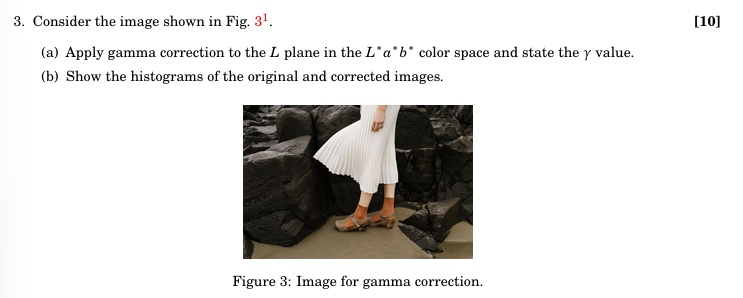

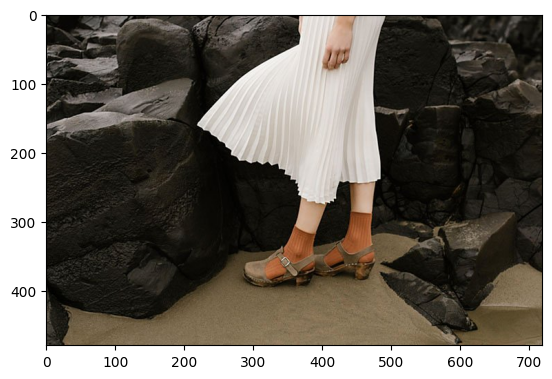

In [187]:
img3 = cv.imread("a1images/highlights_and_shadows.jpg")
img3_rgb = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.imshow(img3_rgb)

In [188]:
img_lab = cv.cvtColor(img3, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_lab)

L_norm = L / 255.0
gamma = 0.5

L_gamma = np.power(L_norm, gamma)
L_corrected = np.uint8(L_gamma * 255)
img_lab_corrected = cv.merge([L_corrected, a, b])
img_corrected = cv.cvtColor(img_lab_corrected, cv.COLOR_LAB2BGR)



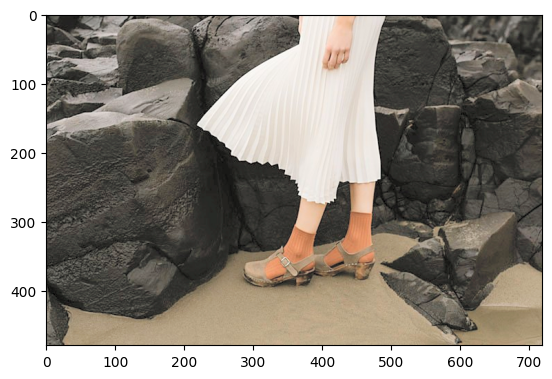

In [189]:
img3_corrected_rgb = cv.cvtColor(img_corrected,cv.COLOR_BGR2RGB)
plt.imshow(img3_corrected_rgb)

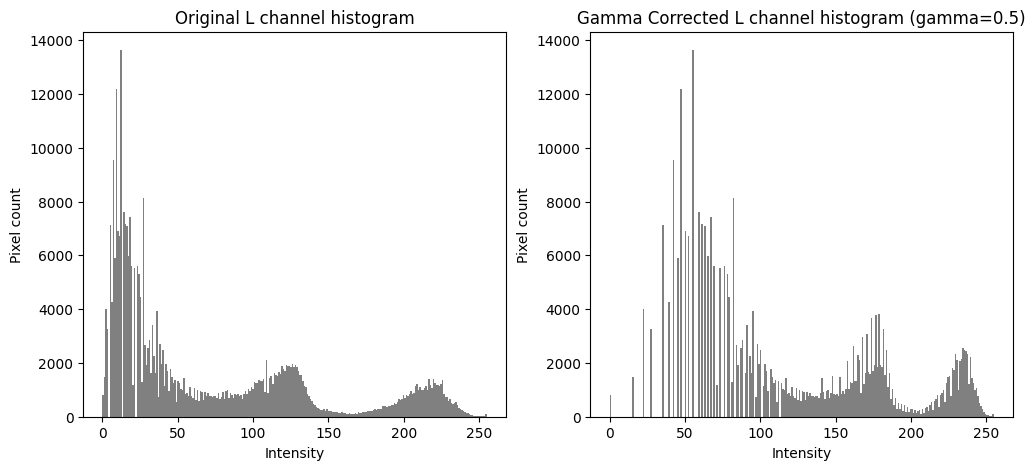

In [190]:
plt.figure(figsize=(12,5))

# Original L histogram
plt.subplot(1,2,1)
plt.hist(L.ravel(), bins=256, color='gray')
plt.title('Original L channel histogram')
plt.xlabel('Intensity')
plt.ylabel('Pixel count')

# Corrected L histogram
plt.subplot(1,2,2)
plt.hist(L_corrected.ravel(), bins=256, color='gray')
plt.title(f'Gamma Corrected L channel histogram (gamma={gamma})')
plt.xlabel('Intensity')
plt.ylabel('Pixel count')

plt.show()


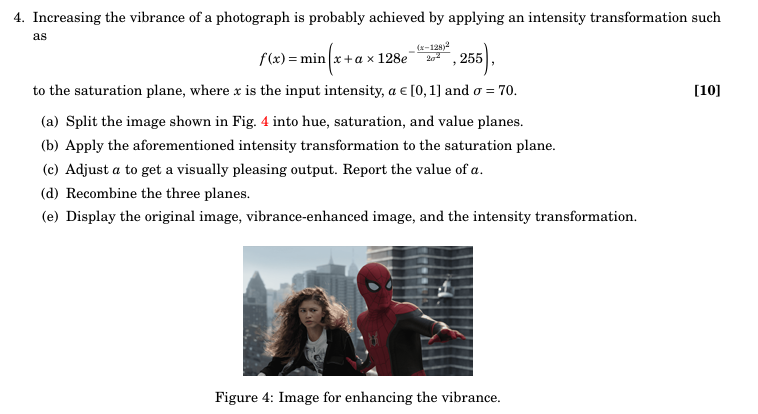

In [204]:
img4 = cv.imread("a1images/spider.png")


In [192]:
hsv = cv.cvtColor(img4,cv.COLOR_BGR2HSV)

h, s, v = cv.split(hsv)

In [193]:
# transformation

a_values = [0.2, 0.5, 0.7, 0.9]
sigma = 70
x = s.astype("float32")

s_new_list = []
img_vibrance_list = []

for a in a_values:
    mul = a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
    s_new = np.minimum(x + mul, 255).astype("uint8")
    s_new_list.append(s_new)

    hsv_new = cv.merge([h, s_new, v])
    img_vibrance = cv.cvtColor(hsv_new, cv.COLOR_HSV2BGR)
    img_vibrance_list.append(img_vibrance)

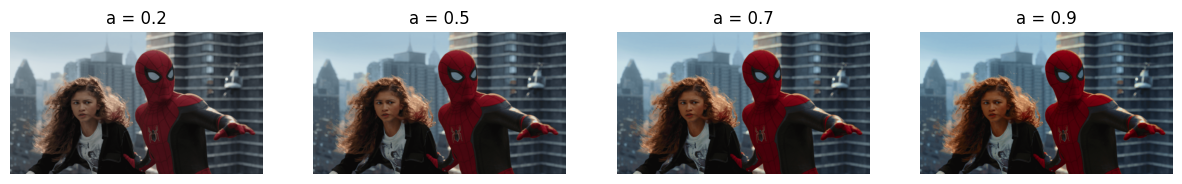

In [194]:
plt.figure(figsize=(15, 5))
for i, a in enumerate(a_values):
    plt.subplot(1, len(a_values), i + 1)
    plt.title(f'a = {a}')
    plt.imshow(cv.cvtColor(img_vibrance_list[i], cv.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

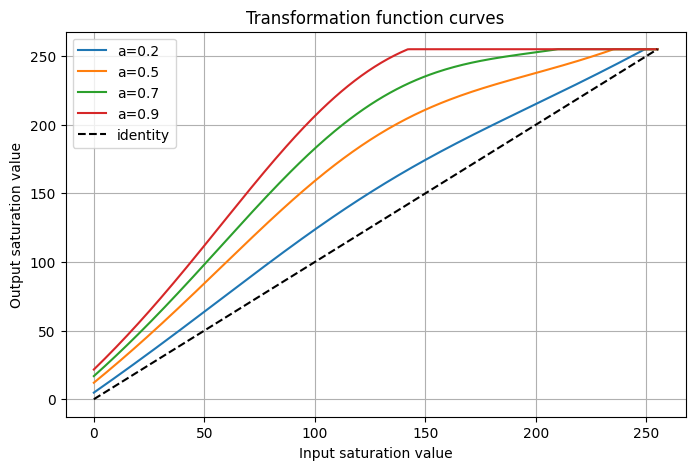

In [195]:
x_vals = np.arange(0, 256, 1, dtype=np.float32)
plt.figure(figsize=(8, 5))

for a in a_values:
    y_vals = x_vals + a * 128 * np.exp(-((x_vals - 128) ** 2) / (2 * sigma ** 2))
    y_vals = np.clip(y_vals, 0, 255)
    plt.plot(x_vals, y_vals, label=f'a={a}')

plt.plot(x_vals, x_vals, 'k--', label='identity')  # y=x line for reference
plt.title("Transformation function curves")
plt.xlabel("Input saturation value")
plt.ylabel("Output saturation value")
plt.legend()
plt.grid(True)
plt.show()

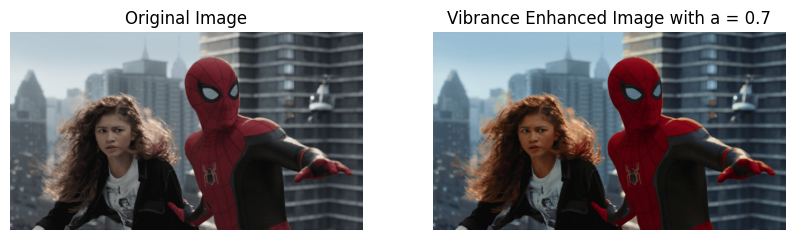

In [203]:
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(img4,cv.COLOR_BGR2RGB))  # Use cmap='gray' if image is grayscale
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.title("Vibrance Enhanced Image with a = 0.7")
plt.imshow(cv.cvtColor(img_vibrance_list[2],cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

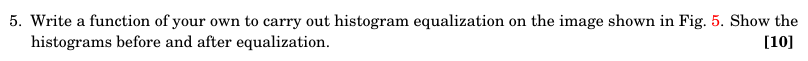

In [212]:
img5 = cv.imread("a1images/shells.tif")



In [209]:
def histogram_equalization(img):
    """
    Perform histogram equalization on a grayscale image.

    Args:
        img (np.ndarray): Grayscale image (2D array, dtype=uint8).

    Returns:
        np.ndarray: Equalized image (uint8).
    """
    # Flatten image to 1D array
    flat = img.flatten()

    # Compute histogram
    hist = np.bincount(flat, minlength=256)

    # Normalize histogram (PDF)
    pdf = hist / flat.size

    # Compute CDF
    cdf = np.cumsum(pdf)

    # Normalize CDF to range [0, 255]
    cdf_normalized = np.floor(255 * cdf).astype(np.uint8)

    # Map original pixel values to equalized values using CDF
    equalized_img = cdf_normalized[flat].reshape(img.shape)

    return equalized_img


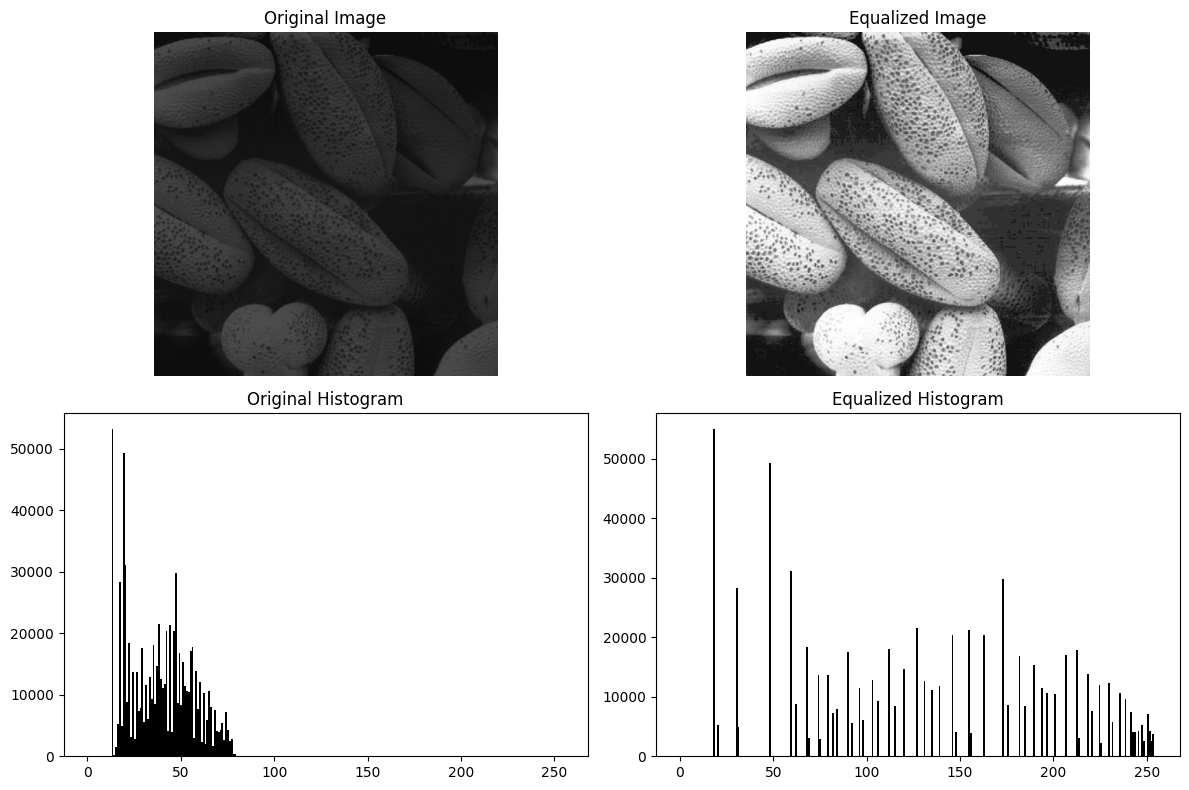

In [211]:

equalized_img = histogram_equalization(img5)

# Plot original and equalized images + histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
axs[0, 0].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Original Histogram
axs[1, 0].hist(img5.ravel(), bins=256, range=[0, 255], color='black')
axs[1, 0].set_title('Original Histogram')

# Equalized Image
axs[0, 1].imshow(cv.cvtColor(equalized_img,cv.COLOR_BGR2RGB))
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

# Equalized Histogram
axs[1, 1].hist(equalized_img.ravel(), bins=256, range=[0, 255], color='black')
axs[1, 1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()